In [1]:
import pandas_datareader as pdr
key=""

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)


c:\python37\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-23 00:00:00+00:00,165.24,166.92,164.09,166.83,36515477,39.378094,39.778453,39.104040,39.757005,146061908,0.0,1.0
1,AAPL,2018-04-24 00:00:00+00:00,162.94,166.33,161.22,165.67,33692017,38.829985,39.637851,38.420094,39.480567,134768068,0.0,1.0
2,AAPL,2018-04-25 00:00:00+00:00,163.65,165.42,162.41,162.62,28382084,38.999184,39.420990,38.703681,38.753726,113528336,0.0,1.0
3,AAPL,2018-04-26 00:00:00+00:00,164.22,165.73,163.37,164.12,27963014,39.135020,39.494865,38.932457,39.111189,111852056,0.0,1.0
4,AAPL,2018-04-27 00:00:00+00:00,162.32,164.33,160.63,164.00,35655839,38.682234,39.161234,38.279492,39.082592,142623356,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-04-14 00:00:00+00:00,165.21,166.32,163.82,164.59,49386480,165.21,166.32,163.82,164.59,49386480,0.0,1.0
1254,AAPL,2023-04-17 00:00:00+00:00,165.23,165.39,164.03,165.09,40713618,165.23,165.39,164.03,165.09,40713618,0.0,1.0
1255,AAPL,2023-04-18 00:00:00+00:00,166.47,167.41,165.65,166.10,49923008,166.47,167.41,165.65,166.10,49923008,0.0,1.0
1256,AAPL,2023-04-19 00:00:00+00:00,167.63,168.16,165.54,165.80,47720166,167.63,168.16,165.54,165.80,47720166,0.0,1.0
1257,AAPL,2023-04-20 00:00:00+00:00,166.65,167.87,165.56,166.09,52456377,166.65,167.87,165.56,166.09,52456377,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1

0       165.24
1       162.94
2       163.65
3       164.22
4       162.32
         ...  
1253    165.21
1254    165.23
1255    166.47
1256    167.63
1257    166.65
Name: close, Length: 1258, dtype: float64

In [12]:
df1.shape

(1258,)

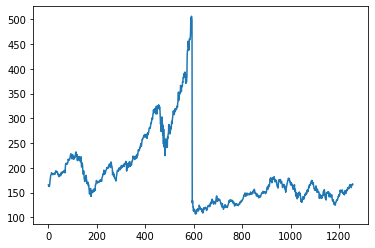

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.14627426],
       [0.14051346],
       [0.1422918 ],
       ...,
       [0.14935504],
       [0.15226049],
       [0.14980589]])

In [20]:
df1.shape

(1258, 1)

In [24]:
#splitting dataset into train and test split
training_size = int(len(df1)*.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:]
training_size,test_size

(817, 441)

In [25]:
train_data,test_data

(array([[1.46274264e-01],
        [1.40513463e-01],
        [1.42291797e-01],
        [1.43719474e-01],
        [1.38960551e-01],
        [1.46324358e-01],
        [1.55942392e-01],
        [1.74652473e-01],
        [1.75453976e-01],
        [1.92836569e-01],
        [1.96167815e-01],
        [1.98396994e-01],
        [2.01678147e-01],
        [2.08390733e-01],
        [2.04758923e-01],
        [2.03656857e-01],
        [1.99373826e-01],
        [2.03731997e-01],
        [2.00751409e-01],
        [1.99048215e-01],
        [2.02354415e-01],
        [2.01177207e-01],
        [2.04182843e-01],
        [2.03656857e-01],
        [2.04733876e-01],
        [2.03030683e-01],
        [2.02028804e-01],
        [2.00450845e-01],
        [2.08891672e-01],
        [2.12874139e-01],
        [2.16581090e-01],
        [2.18259236e-01],
        [2.16956794e-01],
        [2.12548528e-01],
        [2.11371321e-01],
        [2.14001252e-01],
        [2.10043832e-01],
        [2.10294302e-01],
        [2.0

In [27]:
#conver array of dataset to dataset matrix
import numpy 
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [30]:
timestep=100
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data,time_step)

In [31]:
X_train.shape, Y_train.shape

((716, 100), (716,))

In [32]:
X_test.shape, Y_test.shape

((340, 100), (340,))

In [33]:
X_train

array([[0.14627426, 0.14051346, 0.1422918 , ..., 0.27924859, 0.29307451,
        0.28611146],
       [0.14051346, 0.1422918 , 0.14371947, ..., 0.29307451, 0.28611146,
        0.29948654],
       [0.1422918 , 0.14371947, 0.13896055, ..., 0.28611146, 0.29948654,
        0.29304947],
       ...,
       [0.04798998, 0.04763932, 0.04636193, ..., 0.09432686, 0.09718222,
        0.1059737 ],
       [0.04763932, 0.04636193, 0.03544145, ..., 0.09718222, 0.1059737 ,
        0.10429555],
       [0.04636193, 0.03544145, 0.03611772, ..., 0.1059737 , 0.10429555,
        0.09906074]])

In [34]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)


In [35]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 202ms/step - loss: 0.0339 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0140 - val_loss: 0.0019
Epoch 3/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0105 - val_loss: 4.8166e-04
Epoch 4/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0100 - val_loss: 0.0020
Epoch 5/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0095 - val_loss: 0.0010
Epoch 6/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0078 - val_loss: 5.9450e-04
Epoch 7/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0071 - val_loss: 3.8424e-04
Epoch 8/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0073 - val_loss: 3.4173e-04
Epoch 9/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0055 - val_loss: 6.9261e-04
Epoch 10/100
12/12 [==============================] - 2s 126ms/step - l

In [40]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [41]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 27ms/step


In [42]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

224.65392458346832

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

155.69218788143968

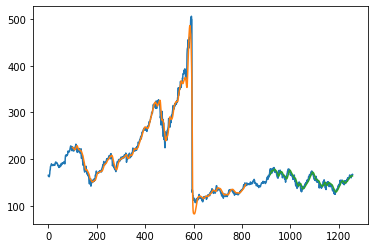

In [48]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [49]:
len(test_data)

441

In [50]:

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:

temp_input

[0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939,
 0.04566061365059482,
 0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.0966562304320600

In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.14569007]
101
1 day input [0.09362555 0.08598622 0.10316844 0.10386976 0.10261741 0.09966187
 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182 0.09675642
 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957 0.07165936
 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193 0.05783344
 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719
 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852
 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858
 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582
 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772
 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987
 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253
 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799
 0.11458986 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627
 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827
 0.13906074 0.14542267 0.14860363 

8 day output [[0.1480669]]
9 day input [0.08969317 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929
 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675
 0.05808391 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167
 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978
 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594
 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088
 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171
 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0

16 day output [[0.14853248]]
17 day input [0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654
 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244
 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567
 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046
 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617
 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511
 0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14569007
 0.14658873 0.1471498

24 day output [[0.14896019]]
25 day input [0.04566061 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719
 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852
 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858
 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582
 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772
 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987
 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253
 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799
 0.11458986 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627
 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827
 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154
 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922
 0.14935504 0.15226049 0.14980589 0.14569007 0.14658873 0.14714988
 0.14748248 0.14768316 0.14781496 0.14791289 0.14799428 0.14806689
 0.14813402 0.1481971

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [55]:
import matplotlib.pyplot as plt

In [56]:
len(df1)

1258

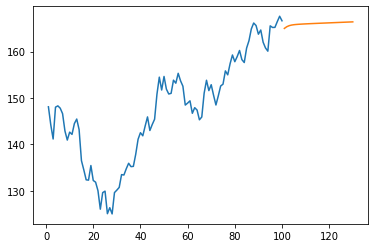

In [57]:

 
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

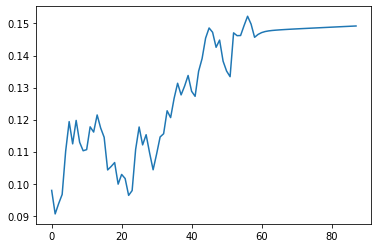

In [58]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [59]:
df3=scaler.inverse_transform(df3).tolist()

NameError: name 'plt' is not defined